# Capítulo 6. Machine Learning.
> Autor: Natalia Cely Callejas, Ronald Arturo Chavez.\
> Universidad Nacional de Colombia  
> Julio 24, 2025


## Qué es un SVM?:
Una SVM (Support Vector Machine) es un algoritmo supervisado de clasificación y regresión que busca encontrar un hiperplano óptimo que separe las clases de manera que la distancia entre el plano y los puntos más cercanos (vectores de soporte) sea máxima.

Código SVM datos generados para clasificación binaria:

Precisión del modelo SVM (blobs): 1.0


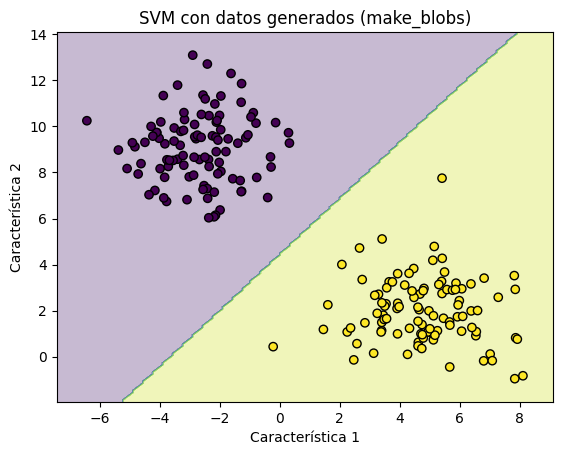

In [1]:
# Importación de librerías necesarias
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import matplotlib.pyplot as plt

# 1. Generar un conjunto de datos sintético con dos clases
X, y = make_blobs(n_samples=200, centers=2, random_state=42, cluster_std=1.5)

# 2. División de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Definición y entrenamiento del modelo SVM con kernel lineal
svm_model = SVC(kernel='linear', C=1.0)
svm_model.fit(X_train, y_train)

# 4. Evaluación del modelo
print("Precisión del modelo SVM (blobs):", svm_model.score(X_test, y_test))

# 5. Visualización del resultado
# Dibujamos los puntos y la frontera de decisión
import numpy as np

# Crear malla para graficar
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))

# Predecir en toda la malla
Z = svm_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Dibujar
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
plt.title("SVM con datos generados (make_blobs)")
plt.xlabel("Característica 1")
plt.ylabel("Característica 2")
plt.show()

Cambios para una aplicación VSM para clasificación de correos (spam vs no spam)

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

emails = [
    "¡Oferta especial solo por hoy!",
    "Reunión con el equipo mañana a las 10",
    "Has sido seleccionado para ganar un premio",
    "Actualización del informe mensual",
    "Gana dinero desde casa fácilmente",
    "Recordatorio de entrega del proyecto",
    "Invierte sin riesgos y obtén grandes ganancias",
    "Agenda de la próxima reunión de trabajo"
]

labels = [1, 0, 1, 0, 1, 0, 1, 0]

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(emails)

X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.3, random_state=42)

model = SVC(kernel='rbf', C=1.0, gamma='scale')
model.fit(X_train, y_train)

precision = model.score(X_test, y_test)
print("Precisión del modelo SVM (clasificación de spam):", precision)


Precisión del modelo SVM (clasificación de spam): 0.3333333333333333


## Árboles de decisión

Un árbol de decisión es un modelo de aprendizaje supervisado que divide los datos en función de decisiones binarias (sí/no, mayor/menor, igual/distinto) hasta llegar a una predicción final.

Ejemplo documentado: 

Precisión del árbol de decisión: 0.9629629629629629


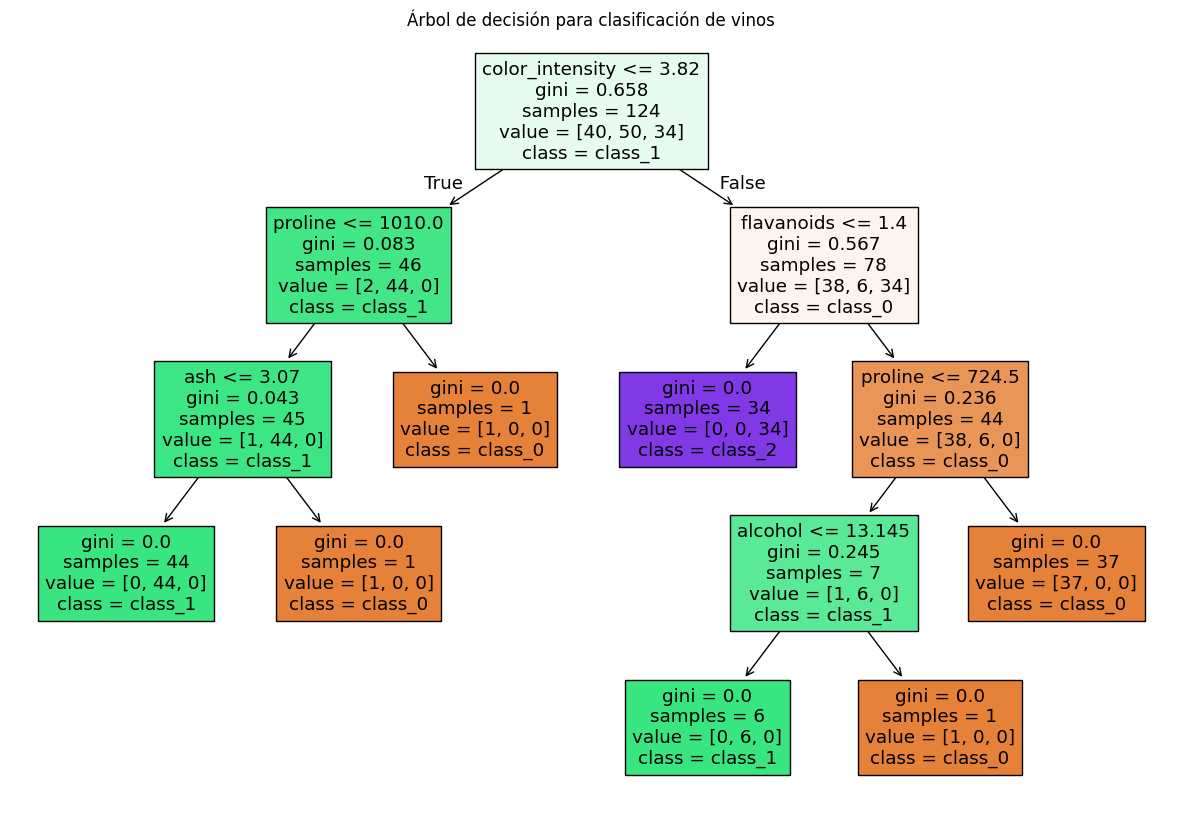

In [7]:
# 1. Importar librerías necesarias
from sklearn.datasets import load_wine
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# 2. Cargar el dataset de vinos
data = load_wine()
X = data.data      # Características
y = data.target    # Etiquetas de clase

# 3. Dividir el conjunto en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 4. Crear el modelo de árbol de decisión
tree_model = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=42)
tree_model.fit(X_train, y_train)

# 5. Evaluar el modelo
accuracy = tree_model.score(X_test, y_test)
print("Precisión del árbol de decisión:", accuracy)

# 6. Visualizar el árbol
plt.figure(figsize=(15, 10))
plot_tree(tree_model, feature_names=data.feature_names, class_names=data.target_names, filled=True)
plt.title("Árbol de decisión para clasificación de vinos")
plt.show()


Cambios para una aplicación práctica, predecir si un cliente comprará o no un producto, con base en características simples (edad, salario, etc.).

In [9]:
# 1. Importar librerías necesarias
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# 2. Dataset extendido: Edad (años), Ingreso mensual (en miles)
X = [
    [25, 2.5], [45, 6.2], [35, 3.0], [50, 8.0],
    [23, 2.0], [40, 7.5], [30, 4.0], [60, 9.0],
    [22, 1.5], [55, 6.8], [33, 4.1], [48, 5.9],
    [28, 3.5], [37, 5.2], [46, 7.0], [29, 3.8]
]

# Etiquetas: 1 = compró, 0 = no compró
y = [0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0]

# 3. Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

# 4. Crear y entrenar el modelo de árbol de decisión
model = DecisionTreeClassifier(max_depth=3, random_state=42)
model.fit(X_train, y_train)

# 5. Realizar predicciones y mostrar el reporte de clasificación
y_pred = model.predict(X_test)

print("Reporte de clasificación:\n")
print(classification_report(y_test, y_pred, zero_division=0))


Reporte de clasificación:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         3

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4



## Aportes de la LLMs.

Con el apoyo de ChatGPT afiné aspectos técnicos del código SVMM, mejoré la documentación y comprendí en profundidad los fundamentos matemáticos y lógicos de cada modelo. la LLMS me brindó herramientas para interpretar los modelos con mayor profundidad, identificar sus límites y tomar decisiones más informadas sobre su implementación. La colaboración con una herramienta de IA como ChatGPT también me mostró el valor del diálogo entre el conocimiento humano y el procesamiento automático, reforzando la idea central de la materia: que el lenguaje, en sus múltiples formas, es clave para comprender, simular y transformar la realidad.



## Conclusiones 
El ejercicio con el algoritmo SVM me permitió comprender cómo este modelo busca separar datos en distintas clases maximizando el margen entre ellos. Al trabajar primero con datos sintéticos y luego con una aplicación real (clasificación de correos spam), entendí el poder de los kernels para resolver problemas no lineales y la importancia de la correcta representación de los datos.

El ejercicio con árboles de decisión me permitió visualizar y entender cómo un modelo puede tomar decisiones secuenciales a partir de reglas simples, experimenté el valor interpretativo del árbol, la importancia del preprocesamiento de datos, y la necesidad de cuidar el sobreajuste.